## IML Project
### 99106255 - 99105901


In [271]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
from scipy.stats import multivariate_normal  
import random


## E-step Function ##
In this function, using the obtained closed form, we update q with the optimal possible value.
$$\hat{q_{n}}^{(i)} =  \frac{\pi_{i}\mathcal{N}(y_i; \mu_k,\,\Sigma_k)}{\sum_{k}^{} \pi_{k}\mathcal{N}(y_i; \mu_k,\,\Sigma_k)}$$


In [272]:
def E_step(data, mu, sigma, pi):
    Q = np.asarray([pi[i] * multivariate_normal.pdf(data, mu[i,:], sigma[i,:,:]) for i in range(n)]).T
    Q = Q / np.reshape(np.sum(Q, axis=1),(len(data), 1))
    return Q


## M-step Function

In this function, using the closed form obtained from the relation:
$$\theta^{(t + 1)} = \argmax_{\theta}\sum_{n}^{} \mathbb{E}_{q_{n}^{(t)}}[log(p_{\mathbf{Y},\mathbf{Z}}(\mathbf{y}_{n},\mathbf{z}_{n};\theta))]$$
which is in the form below:
$$\hat{q_{n}}^{(i)} =  \frac{\pi_{i}\mathcal{N}(y_i; \mu_k,\,\Sigma_k)}{ \sum_{k}^{} \pi_{k}\mathcal{N}(y_i; \mu_k,\,\Sigma_k)}$$
we will update mu, sigma, pi model parameters


In [273]:
def M_step(data, sigma, Q):
    mu =  np.asarray([np.average(data, weights=Q[:,i], axis=0) for i in range(n)])
    for i in range(n):
        sigma[i, :, :] = (data - mu[i,:]).T @ np.multiply((data - mu[i,:]), np.tile(Q[:,i], (2,1)).T)
        sigma[i, :, :] = sigma[i, :, :] / np.sum(Q[:,i])
    pi = np.mean(Q, axis=0)
    return mu, sigma, pi

In [274]:
def plot_M(mu, sigma, data, n, colors):
    rng = np.vstack((np.min(data, axis=0), np.max(data, axis=0)))
    x1 = np.linspace(rng[0,0],rng[1,0],200)  
    x2 = np.linspace(rng[0,1],rng[1,1],200)
    X, Y = np.meshgrid(x1,x2)

    pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure()                                                          # creating the figure and assigning the size
    plt.scatter(data[:,0], data[:,1], s = 3)
    #print(mu)
    for i in range(n):
        Z = multivariate_normal(mu[i,:], sigma[i,:,:])
        plt.contour(X, Y, Z.pdf(pos), colors=colors[i] ,alpha = 0.5) 
    plt.axis('equal')                                                                  # making both the axis equal                                           # Y-Axis
    plt.grid()                                                                         # displaying gridlines

def plot_E(data, Q, n, colors):
    Z = np.argmax(Q, axis=1)
    plt.scatter(data[:,0], data[:,1],color = np.choose(Z,colors), s = 3)

def cluster_match_percent(Q):

    # It compares the matching value of the classification
    # obtained from the algorithm with the actual classification of
    # the information.

    calc_clusters = np.argmax(Q, axis=1)
    indexes = [np.median(calc_clusters[:200]),np.median(calc_clusters[200:400]),np.median(calc_clusters[400:])]
    real_clusters = np.repeat(indexes,200,axis=0)
    return (1 - np.sum((real_clusters - calc_clusters) != 0) / 600) * 100



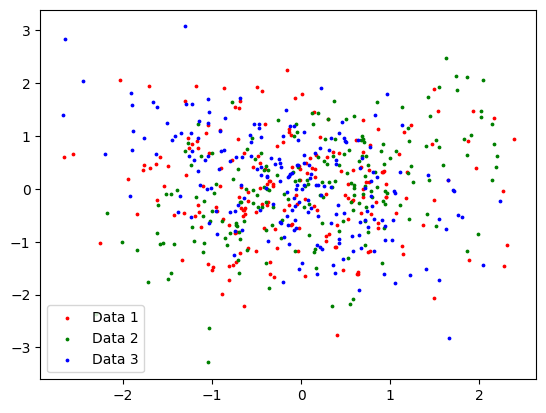

In [275]:
data = np.loadtxt('image2.csv', skiprows=1, delimiter=',')
data = data[:, 1:]

plt.scatter(data[:200,0],data[:200, 1], color='r', label='Data 1', s = 3)
plt.scatter(data[200:400, 0],data[200:400, 1], color='g', label='Data 2', s = 3)
plt.scatter(data[400:, 0], data[400:, 1], color='b', label='Data 3', s = 3)
plt.legend()
plt.show()

## Initialization ##

In [276]:
n = 2                                                   #number of categories
colors = ['r', 'g', 'b']                               
#Initialize model values

mu = data[np.random.randint(0, data.shape[0], n), :]    #Matrix of means
sigma = np.tile(np.cov(data.T), (n,1,1))                #Matrix of covariances
pi = np.repeat(1/n, n, axis = 0)                        #Probability matrix of categories


### Execution

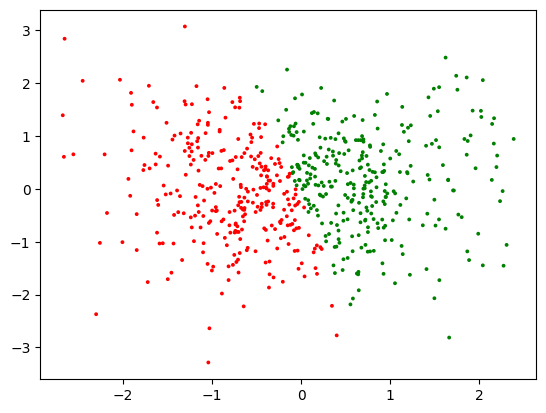

In [277]:
Q = E_step(data, mu, sigma, pi)
plot_E(data, Q, n, colors)

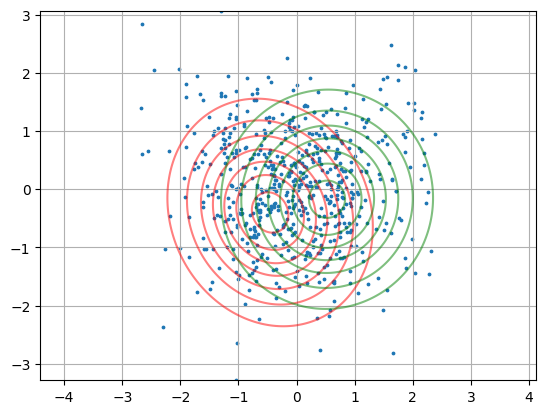

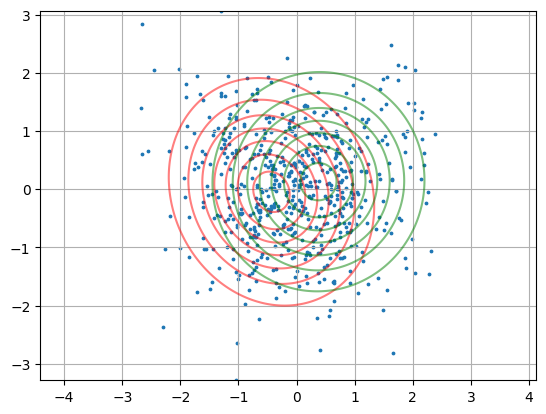

In [278]:
new_mu, new_sigma, new_pi = M_step(data, sigma, Q)

plot_M(mu, sigma, data, n, colors)

plot_M(new_mu, new_sigma, data, n, colors)



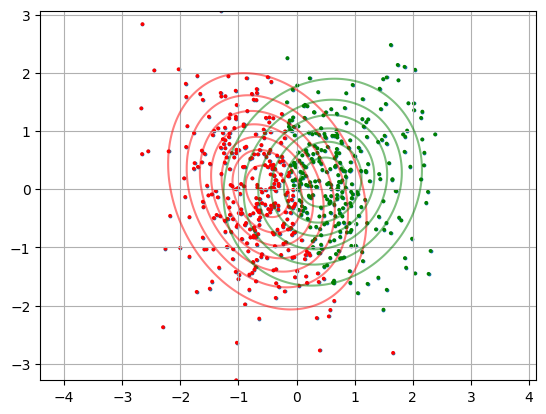

In [279]:
dif = 1000
while dif > 0.01:
    Q = E_step(data, mu, sigma, pi)
    new, sigma, pi = M_step(data, sigma, Q)
    dif = np.linalg.norm(new - mu)
    mu = new
plot_M(mu, sigma, data, n, colors)
plot_E(data, Q, n, colors)
plt.show()

55.00%


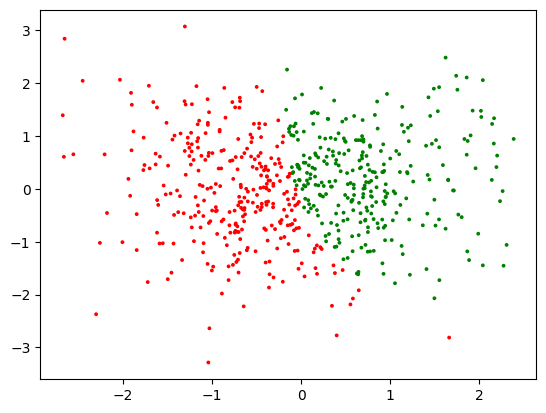

In [280]:
plot_E(data, Q, n, colors)
print("%.2f" % cluster_match_percent(Q) + "%")